## Round 1 

In [142]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor


%matplotlib inline
from sklearn import datasets

In [2]:
churnData = pd.read_csv('DATA_Customer-Churn.csv')

In [3]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [4]:
churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'] , errors='coerce')

In [5]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7032 non-null   float64
 15  Churn             7043 non-null   object 
dtypes: float64(2), int64(2), object(12)
memory

In [6]:
mean_value = churnData['TotalCharges'].value_counts().mean()

In [7]:
churnData['TotalCharges'] = churnData['TotalCharges'].fillna(mean_value)

In [8]:
churnData['TotalCharges'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7043 non-null   float64
dtypes: float64(1)
memory usage: 55.1 KB


#### split the data into a training set and a test set.

In [11]:
TT_SPLIT = 0.2
RAND_STATE = 123  

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
churnData.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [33]:
X.isnull().sum()

SeniorCitizen     0
tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64

In [34]:
 a = churnData.loc[:, ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']]

In [35]:
a['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [36]:
binary_map = {'Yes': 1, 'No': 0}
a['Churn'] = a['Churn'].map(binary_map)

In [37]:
X = a.drop('Churn', axis=1)            #dataframe splitting
y = a['Churn']

log_model = LogisticRegression() 

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

#### (optional)Fit a logistic Regression model on the training data.

,Error_metric,Train,Test
0,Accuracy,0.787185,0.798439
1,Precision,0.649284,0.694215
2,Recall,0.425889,0.444444


Confusion matrix for the train set
[[3800  343]
 [ 856  635]]


Confusion matrix for the test set
[[957  74]
 [210 168]]


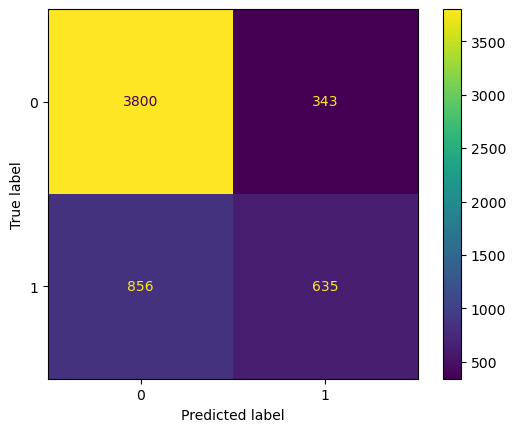

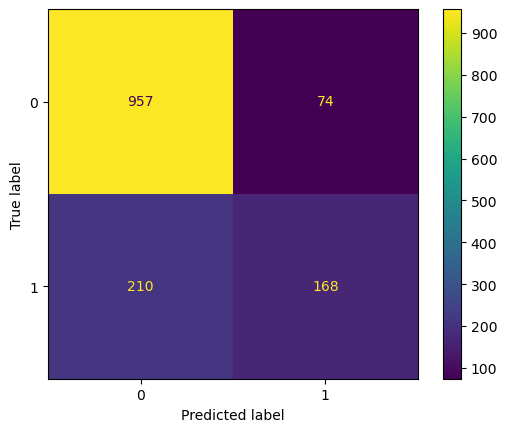

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')


print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')


#### Fit a Knn Classifier(NOT KnnRegressor please!)model on the training data.

In [99]:
for k in range(1, 9):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        accuracy = knn.score(X_test, y_test)
        print(f"k = {k}: accuracy = {accuracy:.3f}")

k = 1: accuracy = 0.699
k = 2: accuracy = 0.757
k = 3: accuracy = 0.748
k = 4: accuracy = 0.767
k = 5: accuracy = 0.763
k = 6: accuracy = 0.774
k = 7: accuracy = 0.773
k = 8: accuracy = 0.780


In [100]:
def knn_classifier(k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    plot_confusion_matrix(knn, X_test, y_test)
    plt.title(f"k = {k}")
    return precision, recall
   
            

In [101]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [102]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

SyntaxError: 'return' outside function (1207723573.py, line 3)

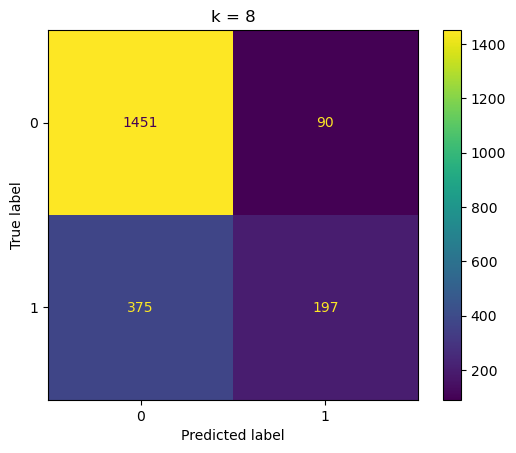

In [103]:
plot_confusion_matrix(knn, X_test, y_test)
plt.title(f"k = {k}")
return precision, recall

k = 1: precision = 0.442, recall = 0.420
k = 2: precision = 0.625, recall = 0.253
k = 3: precision = 0.545, recall = 0.427
k = 4: precision = 0.643, recall = 0.315
k = 5: precision = 0.589, recall = 0.418
k = 6: precision = 0.659, recall = 0.344
k = 7: precision = 0.623, recall = 0.413
k = 8: precision = 0.686, recall = 0.344


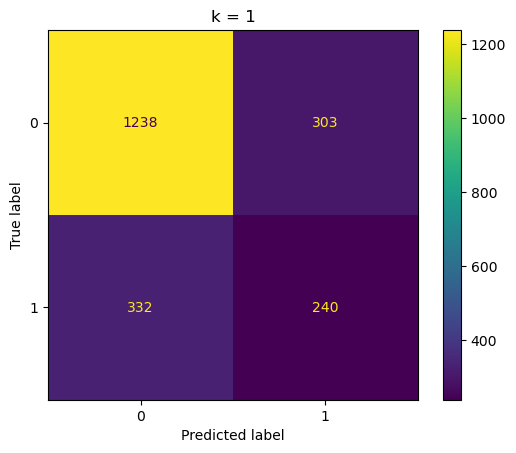

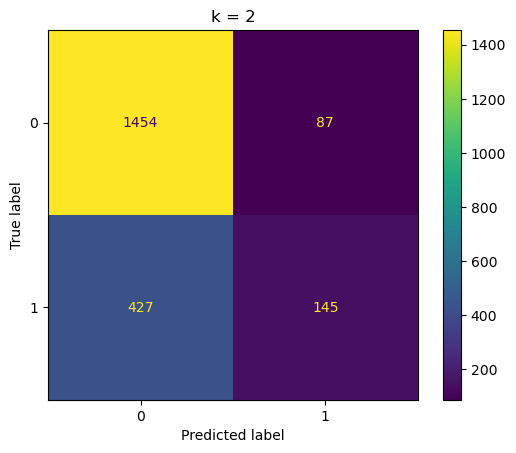

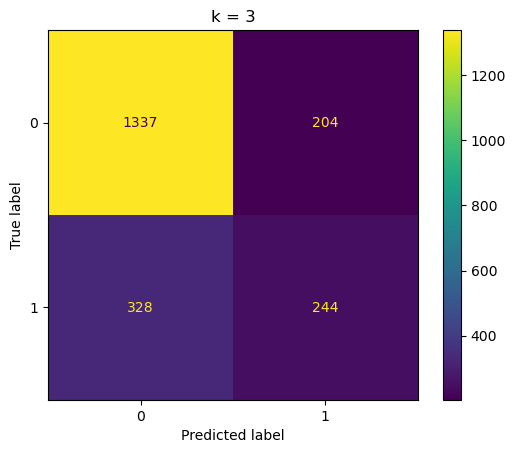

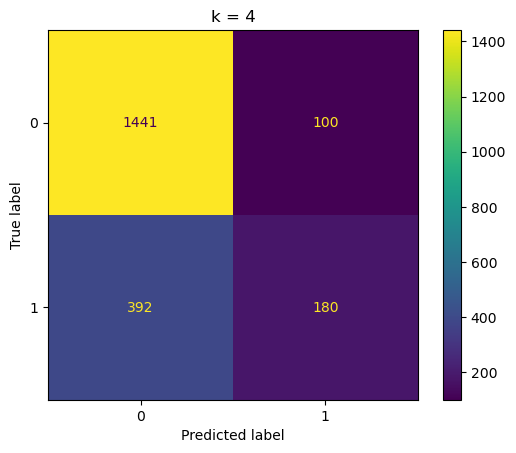

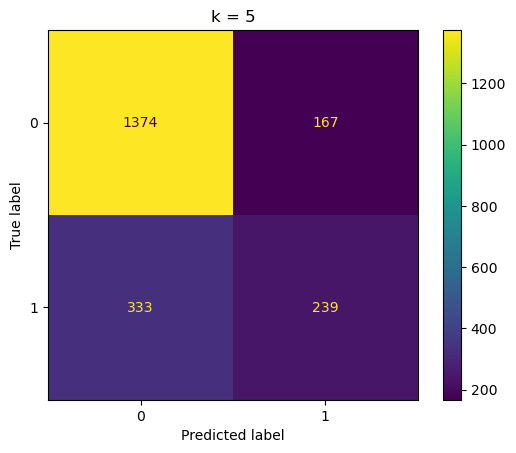

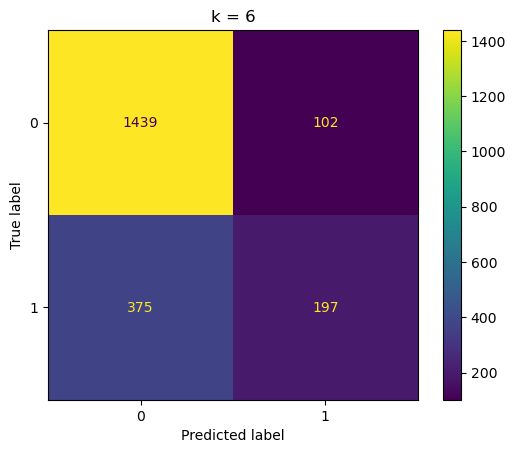

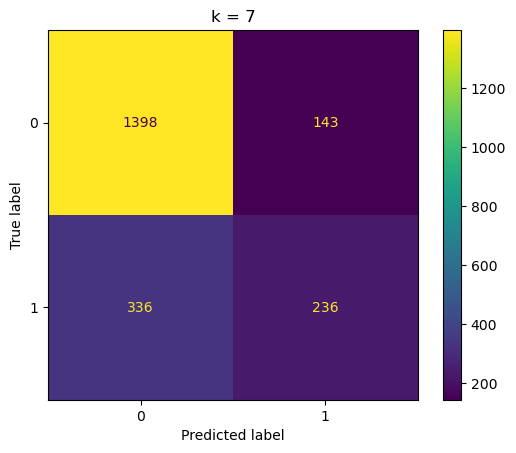

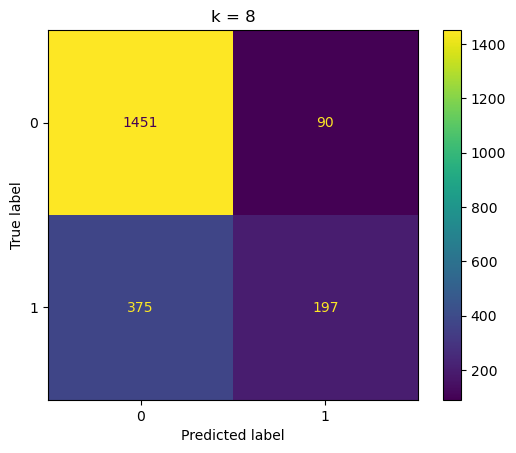

In [105]:
for k in range(1,9):
    precision, recall = knn_classifier(k)
    print(f"k = {k}: precision = {precision:.3f}, recall = {recall:.3f}")
plt.show()

## Round 2

#### Check the accuracy on the test data

In [106]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix


,Error_metric,Train,Test
0,Accuracy,0.79,0.78
1,Precision,0.66,0.66
2,Recall,0.43,0.41


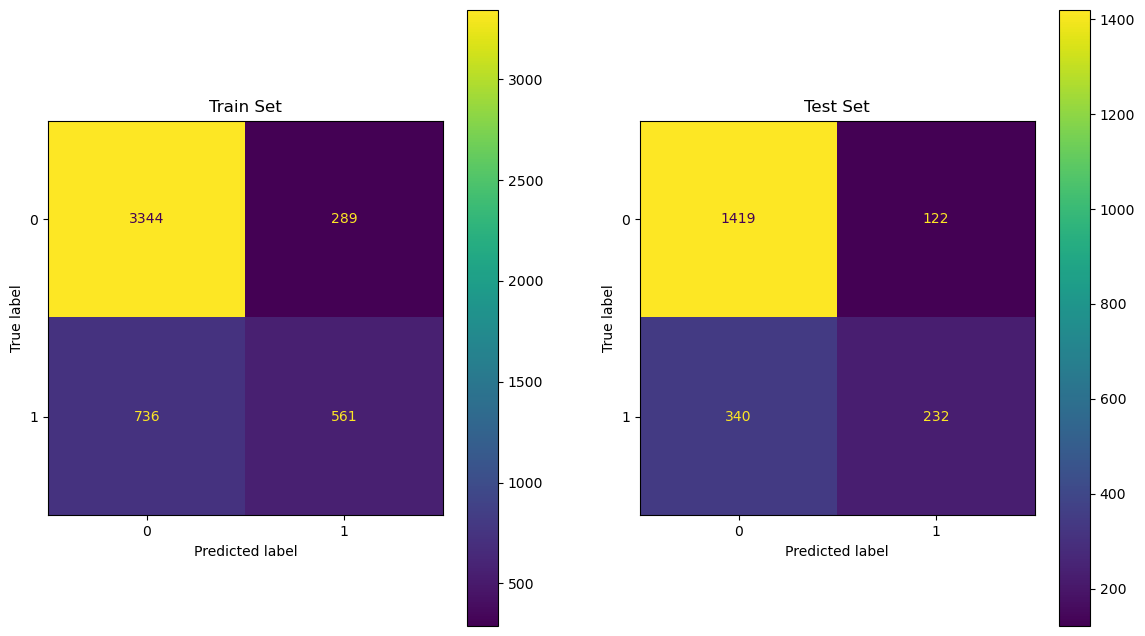

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11)

model = DecisionTreeClassifier(max_depth=4)

model.fit(X_train, y_train)

y_pred_train_dt = model.predict(X_train)
y_pred_test_dt = model.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

fig, ax = plt.subplots(1,2, figsize=(14,8))

plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

#### Features Importances

<BarContainer object of 4 artists>

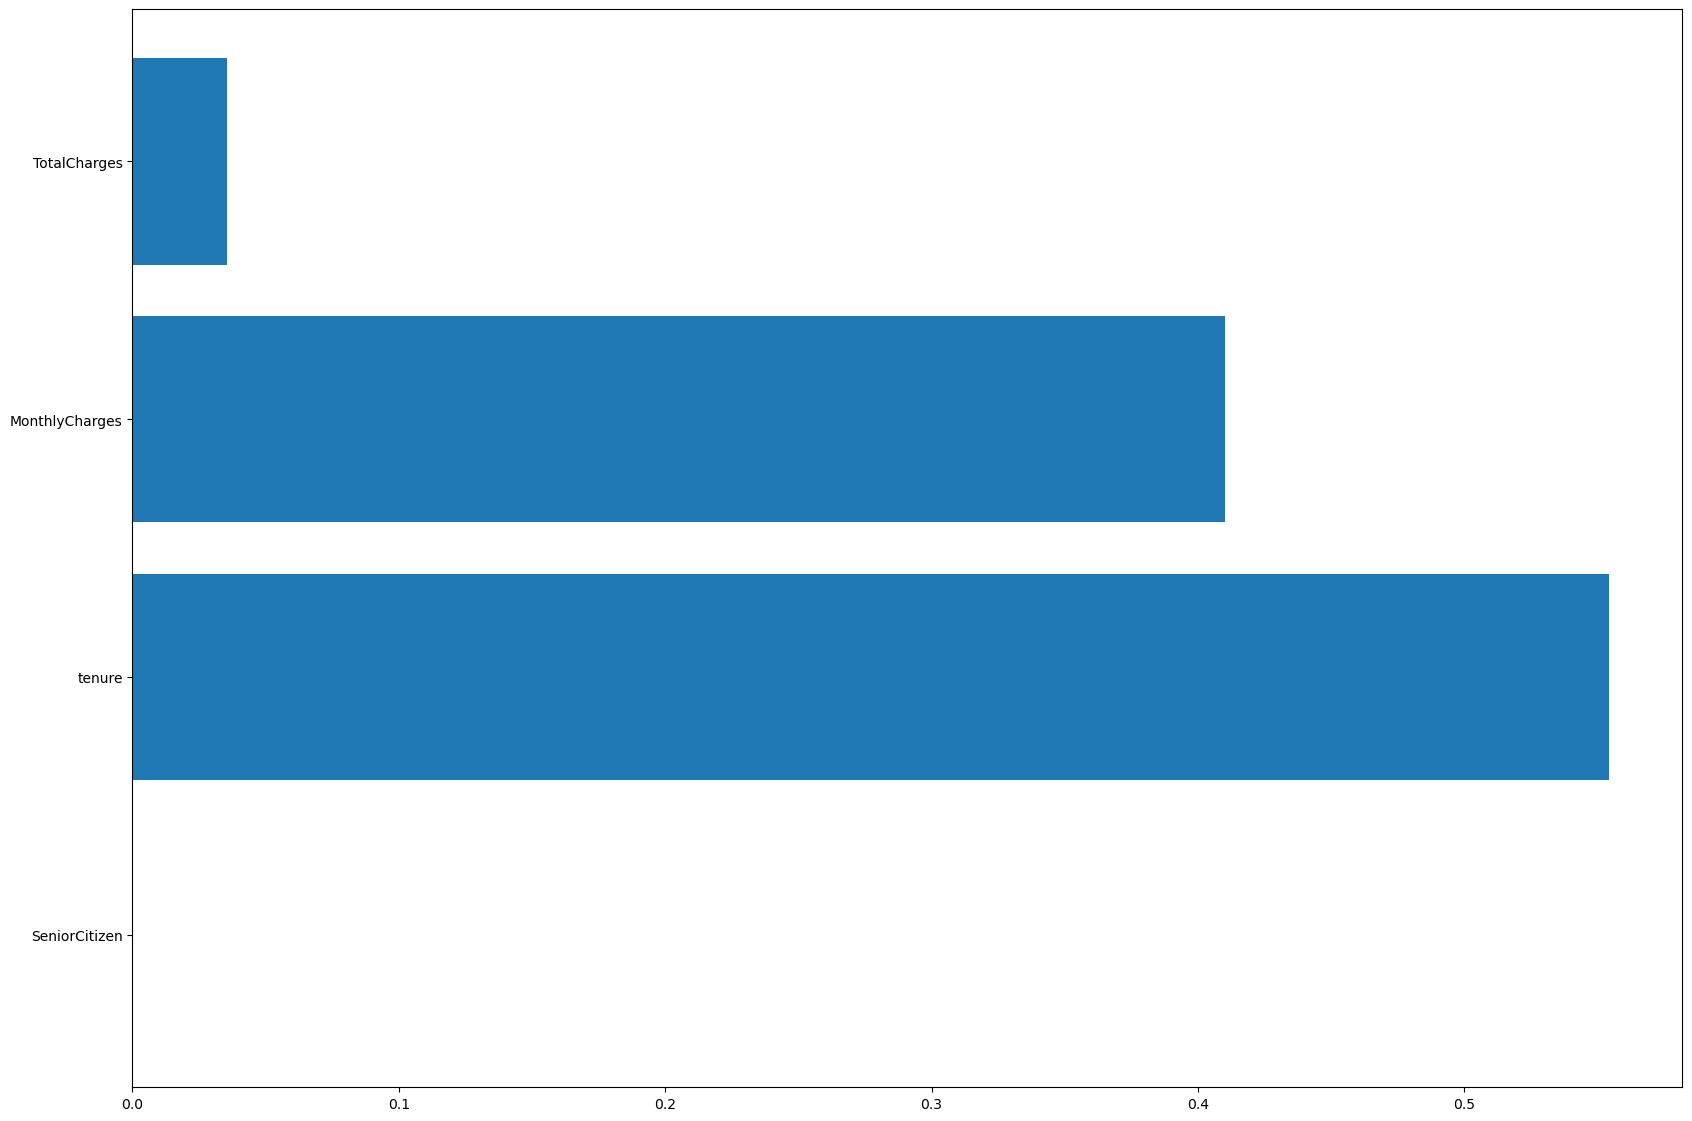

In [108]:
plt.figure(figsize=(20,14))
plt.barh(X.columns,model.feature_importances_)

#### Fit a Decision Tree Classifier on the training data.

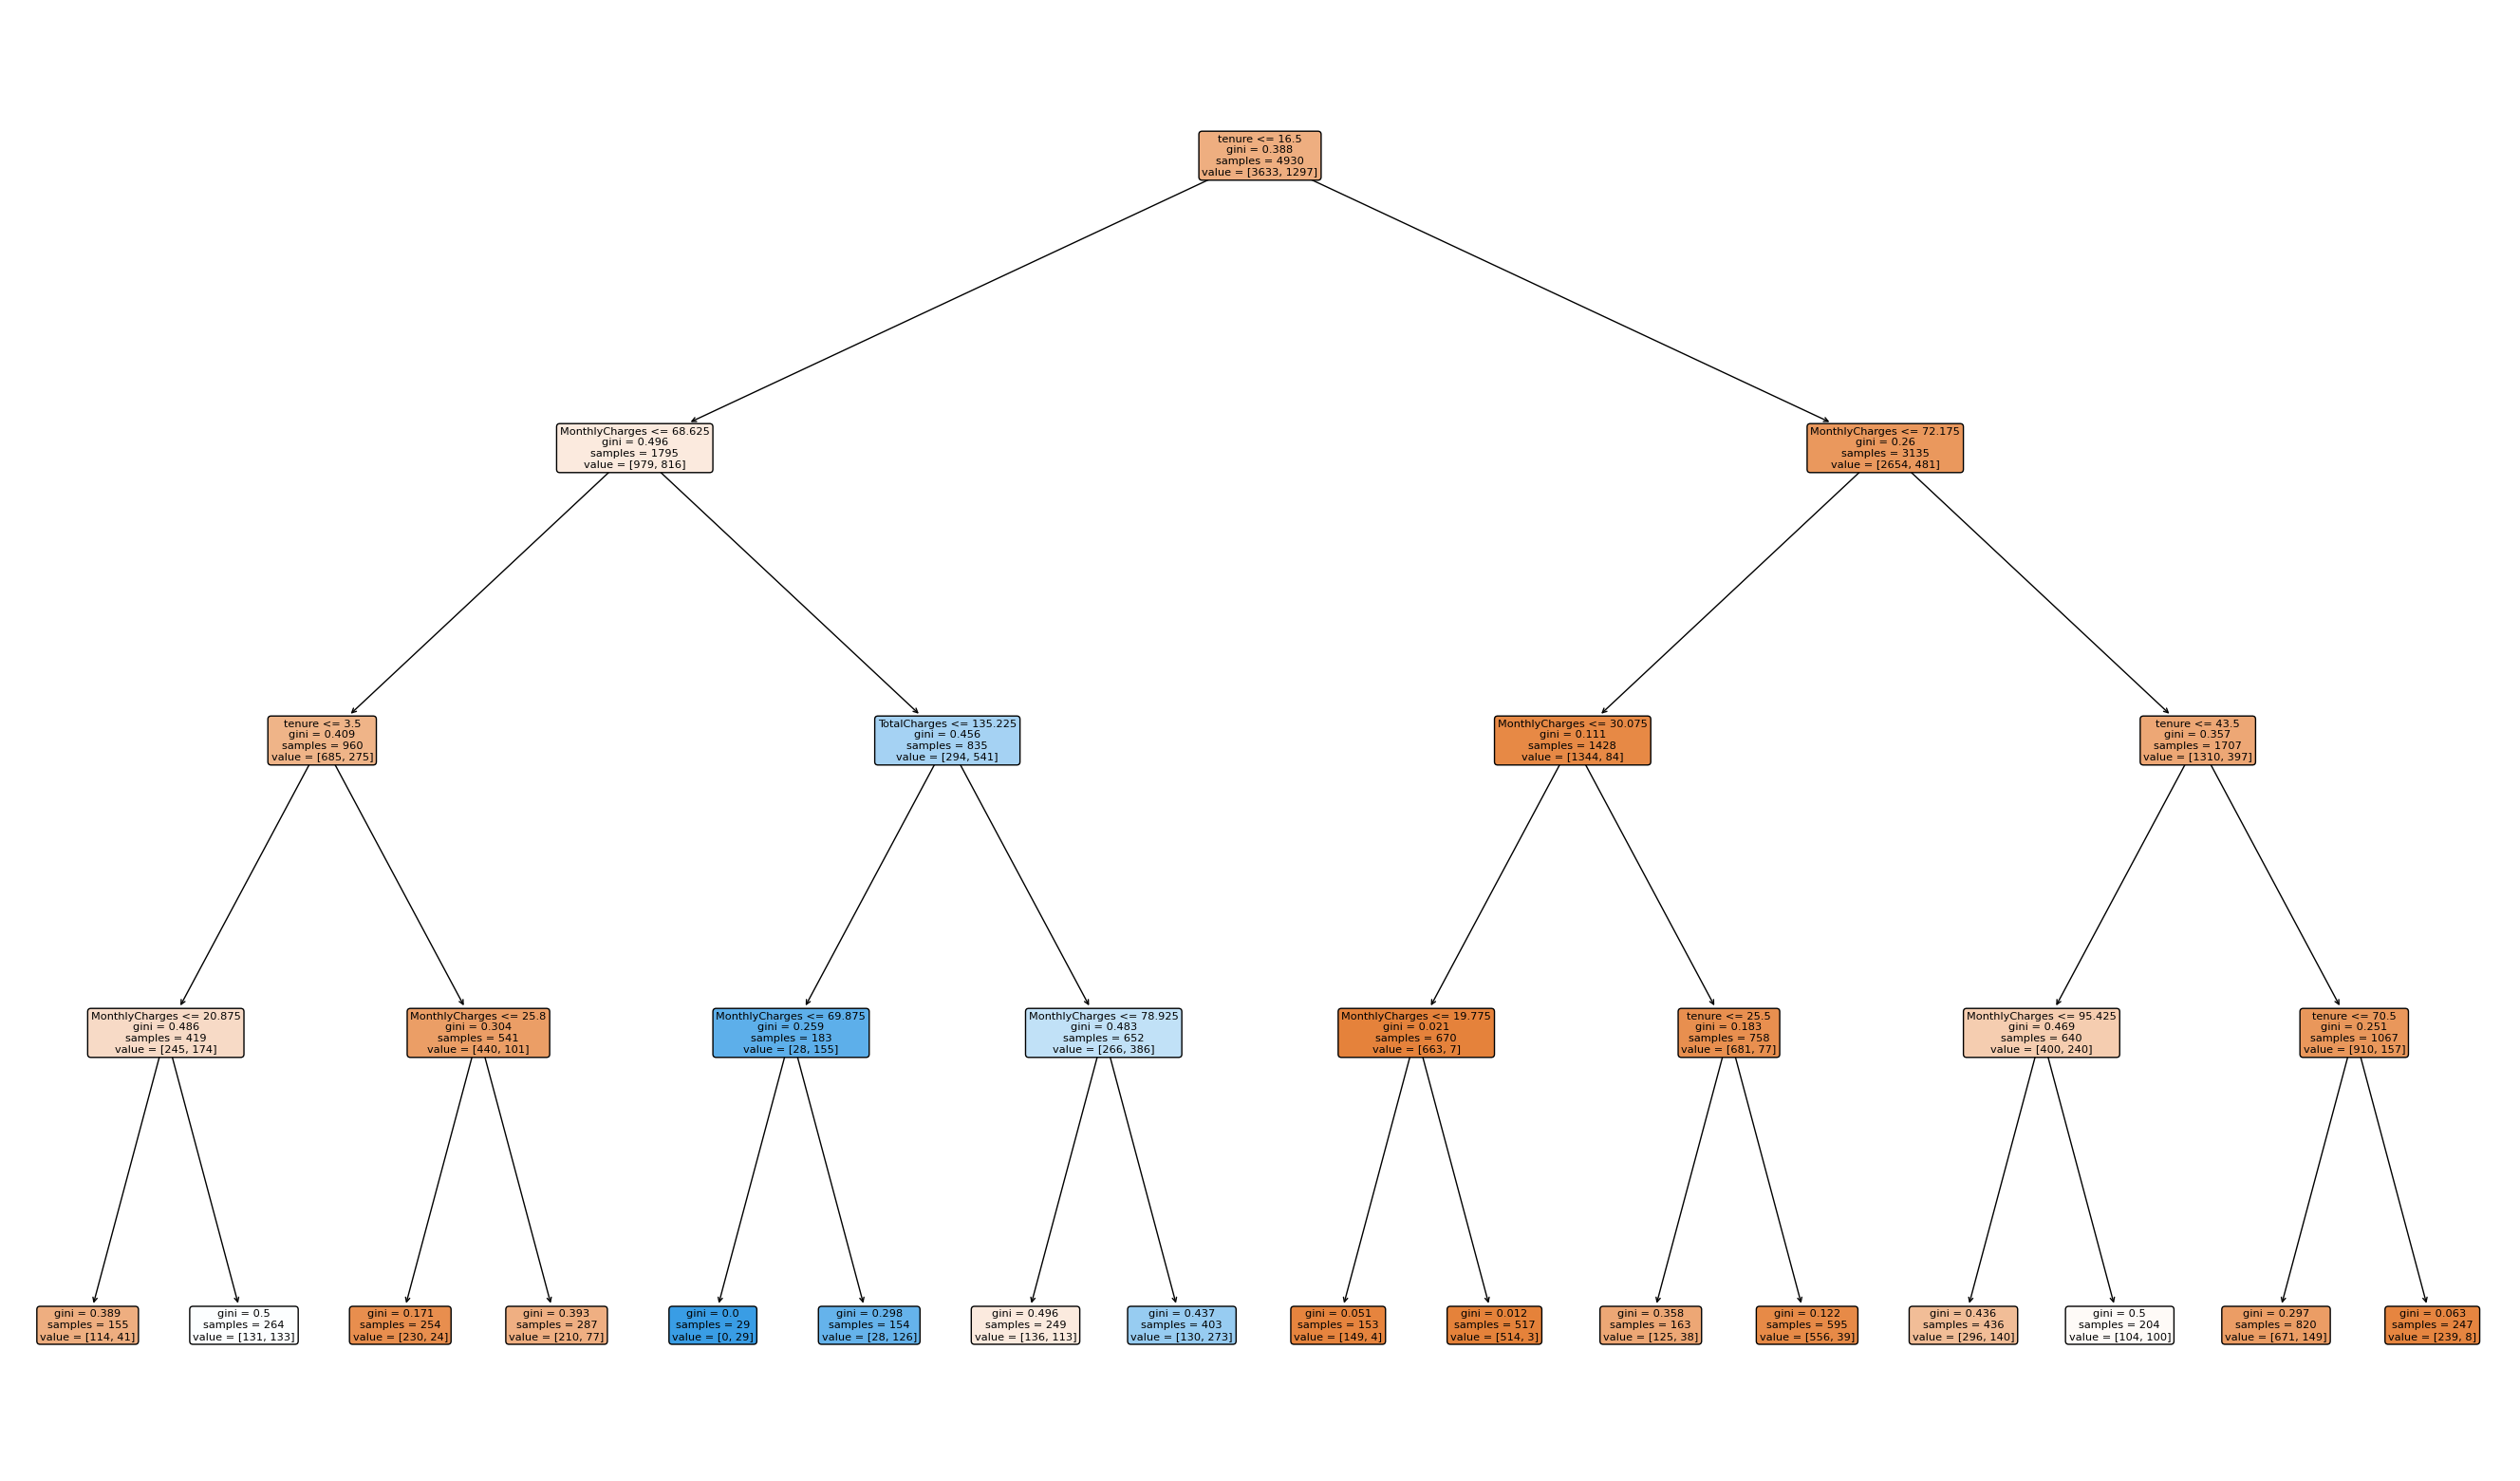

In [109]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(model,filled = True, rounded=True,feature_names=X.columns)
plt.show() 

#### Data splitting and error metrics

In [110]:
model = DecisionTreeRegressor(max_depth=4)

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test  = model.predict(X_test)


In [111]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [112]:
def performance_model(y_train, y_test, y_pred_train, y_pred_test):

    ME_train = np.mean(y_train-y_pred_train)
    ME_test  = np.mean(y_test-y_pred_test)

    MAE_train = mean_absolute_error(y_train,y_pred_train)
    MAE_test  = mean_absolute_error(y_test,y_pred_test)

    MSE_train = mean_squared_error(y_train,y_pred_train)
    MSE_test  = mean_squared_error(y_test,y_pred_test)

    RMSE_train = np.sqrt(MSE_train)
    RMSE_test  = np.sqrt(MSE_test)

    MAPE_train = np.mean((np.abs(y_train-y_pred_train) / y_train)* 100.)
    MAPE_test  = np.mean((np.abs(y_test-y_pred_test) / y_test)* 100.)

    R2_train = r2_score(y_train,y_pred_train)
    R2_test  = r2_score(y_test,y_pred_test)

    performance = pd.DataFrame({'Error_metric': ['Mean error','Mean absolute error','Mean squared error',
                                             'Root mean squared error','Mean absolute percentual error',
                                             'R2'],
                            'Train': [ME_train, MAE_train, MSE_train, RMSE_train, MAPE_train, R2_train],
                            'Test' : [ME_test, MAE_test , MSE_test, RMSE_test, MAPE_test, R2_test]})

    pd.options.display.float_format = '{:.2f}'.format


    df_train = pd.DataFrame({'Real_value': y_train, 'Predicted_value': y_pred_train})
    df_test  = pd.DataFrame({'Real_value': y_test,  'Predicted_value': y_pred_test})

    return performance, df_train, df_test

In [113]:
performance, _ ,_ = performance_model(y_train, y_test, y_pred_train, y_pred_test)
performance

,Error_metric,Train,Test
0,Mean error,0.00,0.01
1,Mean absolute error,0.28,0.29
2,Mean squared error,0.14,0.15
3,Root mean squared error,0.38,0.39
4,Mean absolute percentual error,inf,inf
5,R2,0.27,0.22


#### Decision tree

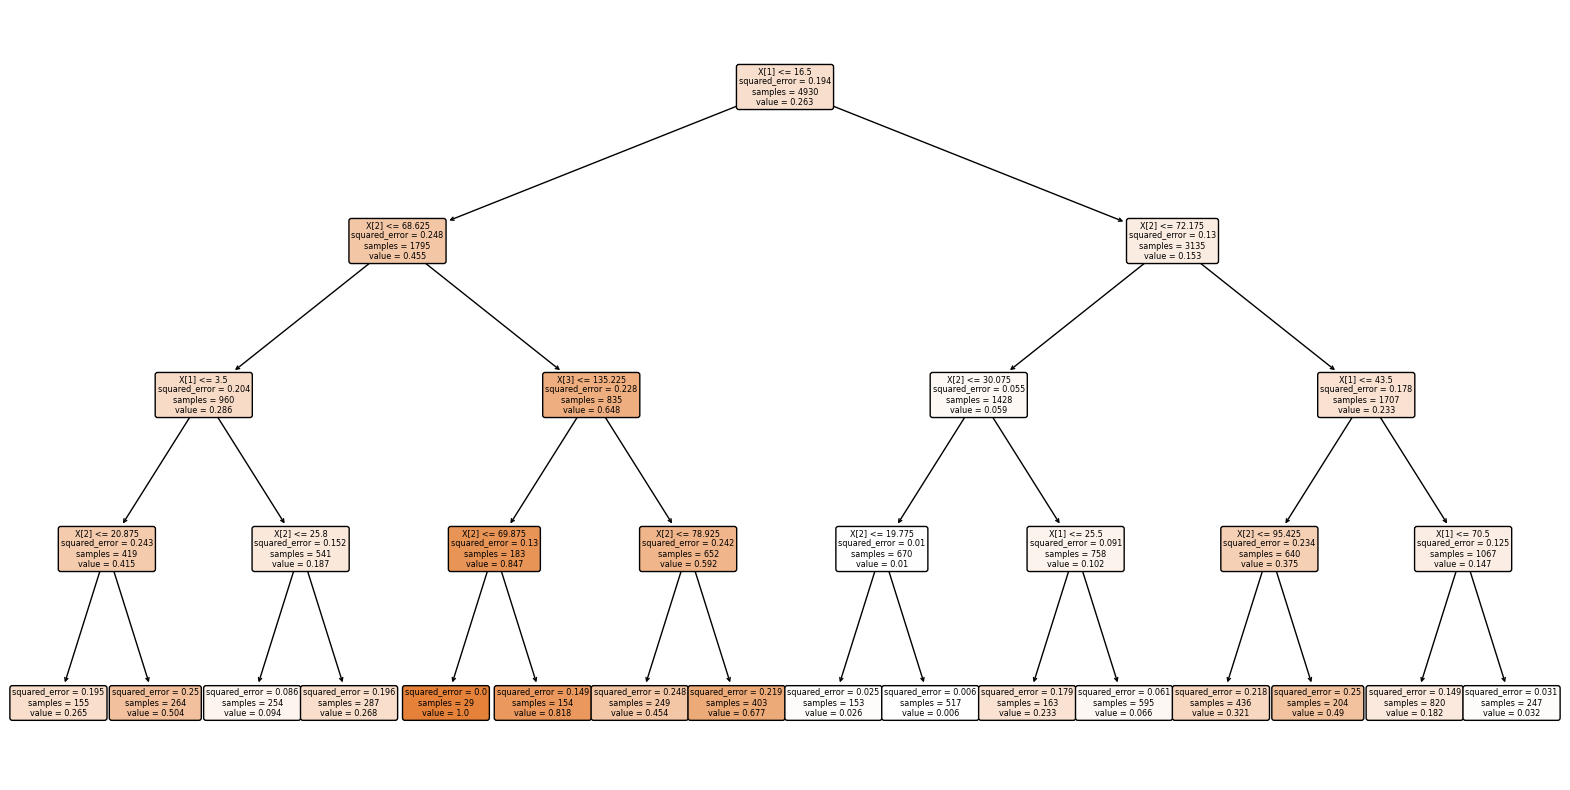

In [114]:
from sklearn.tree import plot_tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,10))

plot_tree(model,filled = True, rounded=True)
plt.show()

## Round 3

#### Apply K-fold cross validation on your models before and check the model score. Note: So far we have not balanced the data.

In [134]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

### data balancing

In [136]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [137]:
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

#### K-fold cross validation 

In [143]:
scores=cross_val_score(model, X_train, y_train, cv=5) # 5 cv foldings
scores

array([0.25140369, 0.24456205, 0.23640152, 0.25484387, 0.24358966])

In [144]:
model1 = DecisionTreeClassifier()
model2 = LogisticRegression()
model3 = KNeighborsClassifier()

model_pipeline = [model1, model2, model3]
model_names = ['Classification Tree', 'Logistic Regression', 'KNN']
scores = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_train, y_train, cv=5))
    scores[model_names[i]] = mean_score
    i = i+1
print(scores)

{'Classification Tree': 0.7310344827586206, 'Logistic Regression': 0.7929006085192698, 'KNN': 0.7718052738336714}


In [146]:
pd.DataFrame([scores], index=["score"])

,Classification Tree,Logistic Regression,KNN
score,0.73,0.79,0.77


In [147]:
set(y)

{0, 1}

In [148]:
scores=cross_val_score(model, X_train, y_train, cv=5) 
scores

array([0.77281947, 0.77991886, 0.77484787, 0.77180527, 0.75963489])

In [149]:
print("Five-fold cv results: \n %0.2f mean accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Five-fold cv results: 
 0.77 mean accuracy with a standard deviation of 0.01


In [150]:
y_test

6625    1
5975    1
6891    0
1681    0
4780    0
       ..
6143    0
4257    0
4590    0
842     1
1864    0
Name: Churn, Length: 2113, dtype: int64

In [151]:
y_pred = cross_val_predict(model, X_test, y_test, cv=5)         #cv=#k
y_pred

array([1, 0, 0, ..., 0, 0, 0])